# SVM
Support Vector Machine é um algorítimo supervisionado capaz de classificar, regredir e encontrar outliers.

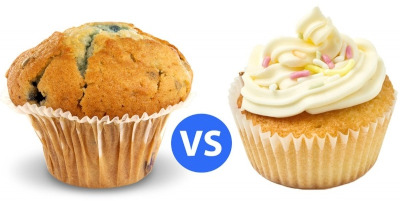

In [90]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [3]:
recipes = pd.read_csv('bases/muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,50,25,12,6,5,2,1,0
4,Muffin,55,27,3,7,5,2,1,0


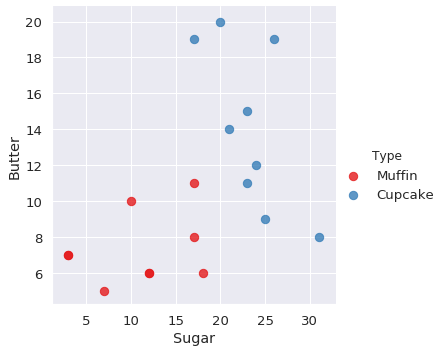

In [4]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [7]:
ingrediente = recipes[['Sugar', 'Butter']].values
tipo = np.where(recipes['Type']=='Muffin', 0, 1)

In [8]:
model = svm.SVC(kernel='linear', decision_function_shape=None)
model.fit(ingrediente, tipo)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

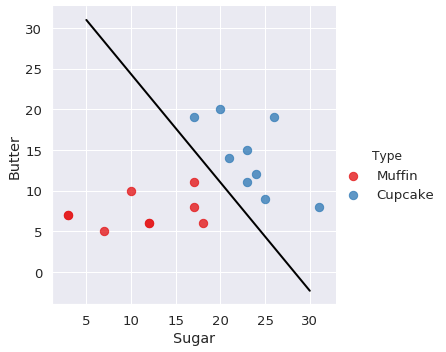

In [11]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');

In [12]:
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

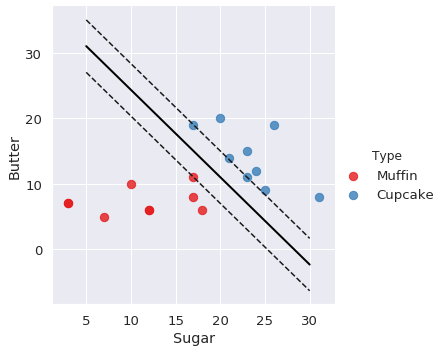

In [13]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [15]:
def muffin_ou_cupcake(sugar, butter):
    if (model.predict([[sugar, butter]])) == 0:
        print('Isto é uma receita de Muffin')
    else:
        print('Isto é uma receita de Cupcake')

In [16]:
muffin_ou_cupcake(20, 10)

Isto é uma receita de Muffin


## Retornando a Íris

In [17]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [91]:
X = df.iloc[:, :4]
y = df.Species

Parâmetros de Configuração:
* C: parâmetro de regularização
* kernel: linear, poly, rbf, sigmoid, precomputed

In [95]:
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
y_pred = clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

In [97]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
y_pred = clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])